For our first attempt, we will be using random forest classifier to fit our classifer to the training data.

In [2]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

training_data = pd.read_csv("data/digit-train.csv")
test_data = pd.read_csv("data/digit-test.csv").values

target = training_data[[0]].values.ravel()
train = training_data.iloc[:,1:].values
test = pd.read_csv("data/digit-test.csv").values

# rf = RandomForestClassifier(n_estimators=100)
# rf.fit(train, target)
# pred = rf.predict(test)

#np.savetxt('data/kaggle-digit-classifier-2016-07-27.csv', np.c_[range(1,len(test)+1),pred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

After submitting this in kaggle, the accuracy gives us around 0.96 which is the entry level. This is similar to the accuracy of the example in the scikit-learn documentation using Support Vector Classification (http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

However, as we can see in the MNIST page (http://yann.lecun.com/exdb/mnist/), convolutional neural networks would yield the most accurate prediction with a test error rate that ranges from 1.7 to 0.23, compared to neural nets (4.7-0.35) and SVMs (1.4 -0.56)

Let's identify first the data, then plot it to get a glimpse of the actual image, so that we can prepare the needed layers for the neural network.

In [2]:
print(training_data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [3]:
target = target.astype(np.uint8)
train = np.array(train).reshape((-1, 1, 28, 28)).astype(np.uint8)
test = np.array(test).reshape((-1, 1, 28, 28)).astype(np.uint8)

This allows us to re-evaluate (reshape) and transform our training data which has 784 columns of pixel data into a 28 x 28 grids. We'll be using matplotlib to graph this data.

In [3]:
%matplotlib inline

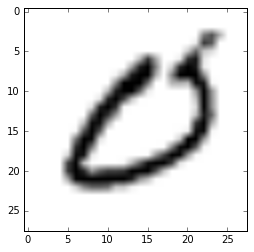

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(train[1729][0], cmap=cm.binary)

We will be using nolearn to build our convolutional neural network. Nolearn is based on the lasagne library, which allows us to build neural networks.

Lasagne and Nolearn can be installed by using pip:
- pip install -r https://raw.githubusercontent.com/Lasagne/Lasagne/master/requirements.txt

- pip install -r https://raw.githubusercontent.com/dnouri/nolearn/master/requirements.txt

In [4]:
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize

ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.
/home/rogue/venv/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


Next, we define a new neural network that will train the data.

In [7]:
training_net = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('hidden', layers.DenseLayer),
            ('output', layers.DenseLayer),
    ],

    input_shape=(None,1,28,28), #input layer
    hidden_num_units=1000, #hidden layer
    output_nonlinearity=lasagne.nonlinearities.softmax, #softmax
    output_num_units=10, #target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.0001,
    update_momentum=0.9,
    max_epochs=15,
    verbose=1,
    )

In [8]:
training_net.fit(train, target)

# Neural Network with 795010 learnable parameters

## Layer information

  #  name    size
---  ------  -------
  0  input   1x28x28
  1  hidden  1000
  2  output  10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1     7.68098     1.72164    4.46144      0.93171  4.62s
      2     0.97681     1.23092    0.79356      0.94004  5.60s
      3     0.43377     1.01726    0.42641      0.94301  7.08s
      4     0.21471     0.95614    0.22456      0.94491  6.90s
      5     0.10507     0.92802    0.11322      0.94801  6.17s
      6     0.05272     0.93469    0.05640      0.94777  6.70s
      7     0.02530     0.91683    0.02759      0.94694  6.68s
      8     0.01284     0.88810    0.01446      0.94955  7.02s
      9     0.00666     0.83722    0.00796      0.95062  7.48s
     10     0.00347     0.83106    0.00417      0.95074  6.97s
     11     0.00166     0.83551    0.00199      0.95062  7.00s
     12     0.0

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f14ff78a590>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f14ff78a450>,
     check_input=True, custom_scores=None, hidden_num_units=1000,
     input_shape=(None, 1, 28, 28),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=15, more_params={},
     objective=<function objective at 0x7f14ff7932a8>,
     objective_loss_function=<function categorical_crossentropy at 0x7f14ff8b96e0>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7f14ff7b9680>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x7f14ff7b96c8>],
     output_nonlinearity=<function softmax at 0x7f1503bf3c80>,
     output_num_units

Implementing the neural network above gives us 0.95 accuracy. Although a bit lesser than our random classifier, this is still quite good by itself. 

Next, we'll be implementing convolutional neural network.

A convolutional neural network (CNN) refers to a type of neural network which uses the convolution operator (often the 2D convolution when it is used for image processing tasks) to extract features from the data. In image processing, filters, that are convoluted with images, are learned automatically to solve the task at hand, e.g. a classification task.

In our case, we will be using two convolutional layers (filtering), and one pooling layer.

In [8]:
def CNN(n_epochs):
    net1 = NeuralNet(
        layers=[
            ('input', layers.InputLayer),
            ('conv1', layers.Conv2DLayer),
            ('pool1', layers.MaxPool2DLayer),
            ('conv2', layers.Conv2DLayer),
            ('pool2', layers.MaxPool2DLayer),
            ('hidden3', layers.DenseLayer),
            ('output', layers.DenseLayer),
        ],
        input_shape=( None , 1, 28, 28),
        conv1_num_filters=7,
        conv1_filter_size=(3, 3),
        conv1_nonlinearity=lasagne.nonlinearities.rectify,
        pool1_pool_size=(2, 2),
        conv2_num_filters=12,
        conv2_filter_size=(2, 2),
        conv2_nonlinearity=lasagne.nonlinearities.rectify,
        pool2_pool_size=(2, 2),
        hidden3_num_units=1000,
        output_num_units=10,
        output_nonlinearity=lasagne.nonlinearities.softmax,
        update_learning_rate=0.0001,
        update_momentum=0.9,
        max_epochs=n_epochs,
        verbose=1,
        )
    return net1
cnn = CNN(2).fit(train,target)

# Neural Network with 443428 learnable parameters

## Layer information

  #  name     size
---  -------  --------
  0  input    1x28x28
  1  conv1    7x26x26
  2  pool1    7x13x13
  3  conv2    12x12x12
  4  pool2    12x6x6
  5  hidden3  1000
  6  output   10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     1.68334     0.43249    3.89217      0.86639  24.80s
      2     0.34214     0.29701    1.15195      0.90886  27.64s


As can be seen, as the epoch increases, the accuracy increases until it tapers off at the maximum value. While the accuracy in 5 epochs arguably is not as high as that of our random classifier, we should note that as the amount of training data that we have increases our accuracy for CNN does as well. The main problem that we have with it later on would be overfitting.

In [6]:
def CNN2(n_epochs):
    net2 = NeuralNet(
            layers=[
            ('input', layers.InputLayer),
            ('conv1', layers.Conv2DLayer),
            ('pool1', layers.MaxPool2DLayer),
            ('conv2', layers.Conv2DLayer),
            ('pool2', layers.MaxPool2DLayer),
            ('dense', layers.DenseLayer),                
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
        ],
        input_shape=( None , 1, 28, 28),
        conv1_num_filters=32,
        conv1_filter_size=(5, 5),
        conv1_nonlinearity=lasagne.nonlinearities.rectify,
        conv1_W=lasagne.init.GlorotUniform(),
        pool1_pool_size=(2, 2),
        conv2_num_filters=32,
        conv2_filter_size=(5, 5),
        conv2_nonlinearity=lasagne.nonlinearities.rectify,
        pool2_pool_size=(2, 2),
        dense_num_units=256,
        dense_nonlinearity=lasagne.nonlinearities.rectify,
        dropout2_p=0.5,
        output_nonlinearity=lasagne.nonlinearities.softmax,
        output_num_units=10,
        update=nesterov_momentum,
        update_learning_rate=0.001,
        update_momentum=0.9,
        max_epochs=n_epochs,
        verbose=1
        )
    return net2
# Train the network
cnn2 = CNN2(15).fit(train, target)

# Neural Network with 160362 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x28x28
  1  conv1     32x24x24
  2  pool1     32x12x12
  3  conv2     32x8x8
  4  pool2     32x4x4
  5  dense     256
  6  dropout2  256
  7  output    10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -------
      1     2.39802     0.36396    6.58869      0.89233  194.38s
      2     0.42242     0.21683    1.94816      0.93135  206.07s
      3     0.29762     0.16559    1.79728      0.94729  203.16s
      4     0.24954     0.15434    1.61687      0.94955  212.40s
      5     0.22071     0.13913    1.58635      0.95467  205.69s
      6     0.19884     0.12322    1.61367      0.96062  200.09s
      7     0.18463     0.12016    1.53650      0.95979  205.61s
      8     0.17093     0.11670    1.46467      0.96252  208.19s
      9     0.15950     0.11063    1.44174      0.96395  197.47s
